<a href="https://colab.research.google.com/github/Show108/Attendance_Tracking_Backend/blob/main/firstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StndardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.metrics import mean_absolute_error

from google.colab import files
uploaded = files.upload()


Saving MicrosoftStock.csv to MicrosoftStock.csv


In [ ]:
data = pd.read_csv('MicrosoftStock.csv')

In [ ]:
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [ ]:
data.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


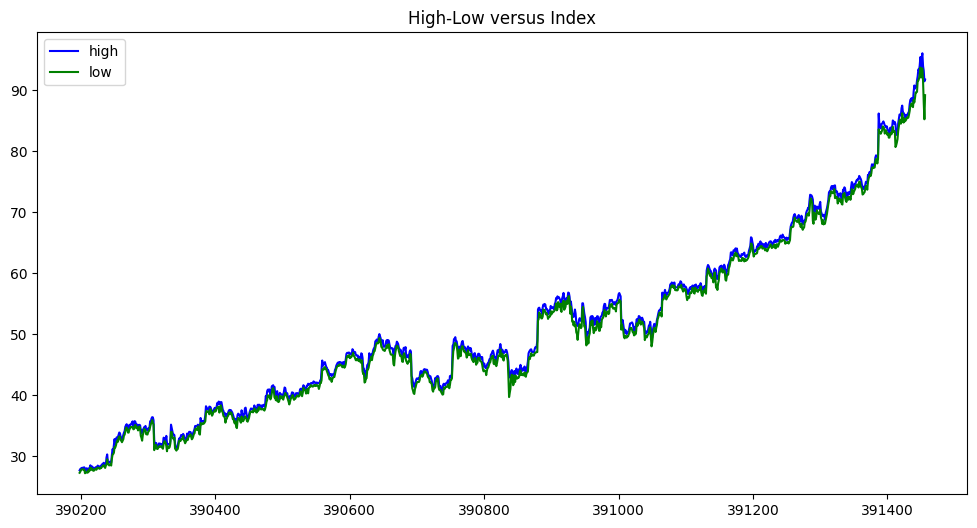

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['index'], data['high'], label='high', color='blue')
plt.plot(data['index'], data['low'], label='low', color='green')
plt.title('High-Low versus Index')
plt.legend()
plt.show()

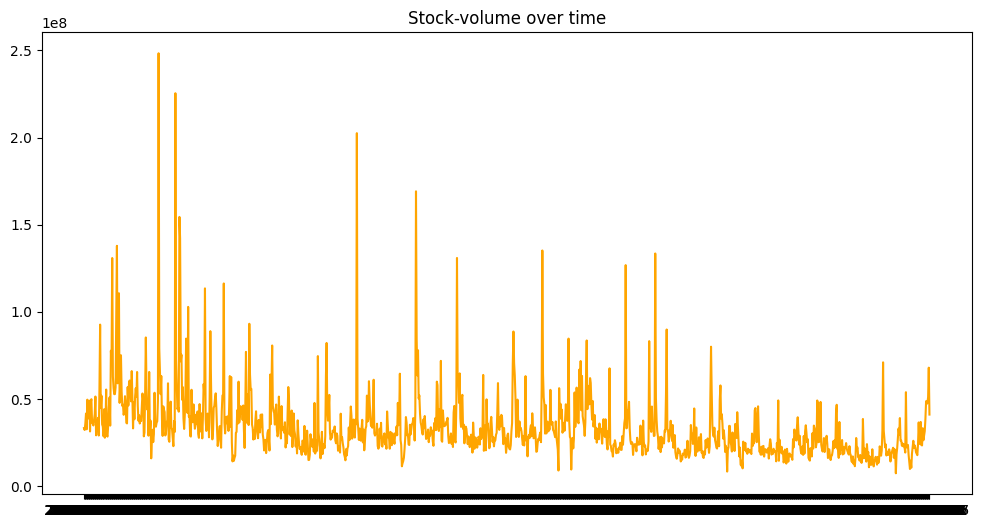

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['volume'], label='volume', color='orange')
plt.title('Stock-volume over time')
plt.show()

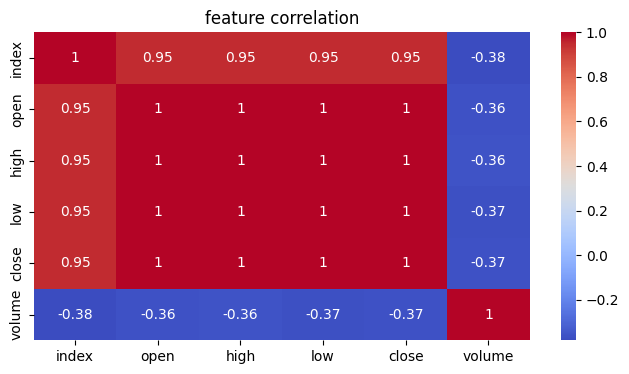

In [ ]:
#remove non-numerical Data
nd= data.select_dtypes(include=['int64','float64'])
#check correlation
plt.figure(figsize=(8,4))
sns.heatmap(nd.corr(), annot=True, cmap='coolwarm')
plt.title('feature correlation')
plt.show()

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
pred= data.loc[
    (data['date']> datetime(2013,1,1))&
    (data['date']< datetime(2018,1,1))
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.3670 - root_mean_squared_error: 0.4952
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.1343 - root_mean_squared_error: 0.1793
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.1170 - root_mean_squared_error: 0.1584
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.1126 - root_mean_squared_error: 0.1493
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.1050 - root_mean_squared_error: 0.1487
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.1084 - root_mean_squared_error: 0.1434
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.1089 - root_mean_squared_error: 0.1483
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.1115 - root_mean_squared_error: 0.1468
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1066 - root_mean_squared_error: 0.1540
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.1010 - root_mean_squared_error: 0.

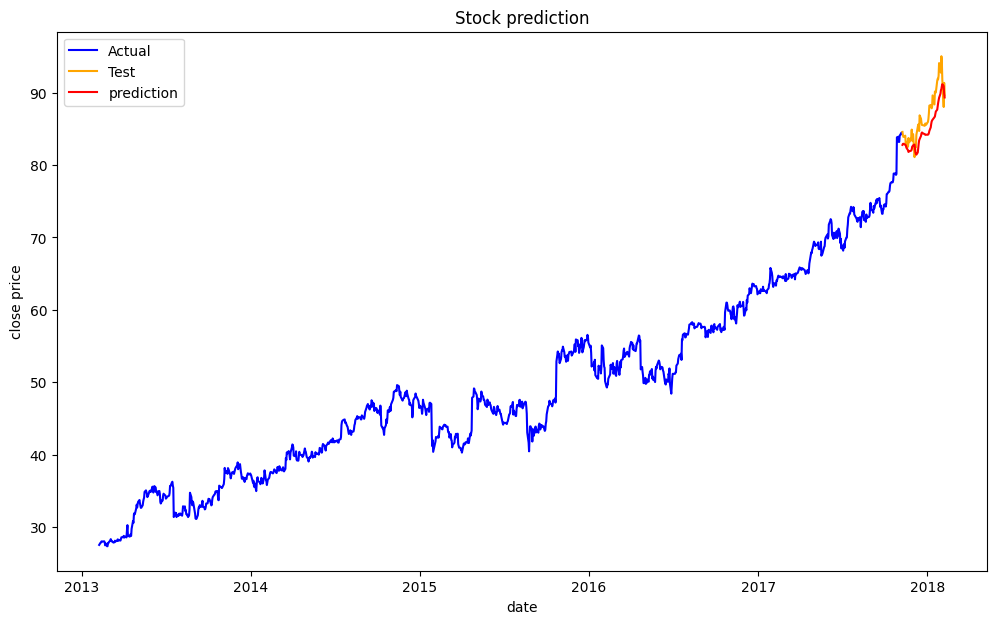

In [ ]:
#using LSTM
stock_close = data.filter(['close'])
dataset= stock_close.values
training_data_len= int(np.ceil(len(dataset) *0.95))
scaler= StandardScaler()
scaled_data =  scaler.fit_transform(dataset)
training_data = scaled_data[:training_data_len]

X_train,Y_train= [],[]


for i in range(60, len(training_data)):
  X_train.append(training_data[i-60:i,0])
  Y_train.append(training_data[i,0])

X_train, Y_train= np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

#keras

model= keras.models.Sequential()

#first layer
model.add(keras.layers.LSTM(64, return_sequences= True, input_shape=(X_train.shape[1],1)))
#second layer
model.add(keras.layers.LSTM(64, return_sequences= False ))
#third layer
model.add(keras.layers.Dense(128, activation='relu' ))
#drop layer
model.add(keras.layers.Dropout(0.5))
#final layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss='mae',
              metrics=[keras.metrics.RootMeanSquaredError()])
training = model.fit(X_train,Y_train,epochs=20,batch_size=32)
test_data = scaled_data[training_data_len-60:]
X_test,Y_test= [], dataset[training_data_len]

for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

X_test = np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

prediction=model.predict(X_test)
prediction=scaler.inverse_transform(prediction)

train= data[:training_data_len]
test= data[training_data_len:]
test = test.copy()
test['Prediction'] = prediction


lstm_mae = mean_absolute_error(test['close'], test['Prediction'])
print(f"LSTM MAE (in real prices): {lstm_mae:.4f}")

print("LSTM test indices:", test.index)

plt.figure(figsize=(12,7))
plt.plot(train['date'], train['close'], label='Actual',color='blue')
plt.plot(test['date'], test['close'], label='Test',color='orange')
plt.plot(test['date'], test['Prediction'], label='prediction',color='red')

plt.title('Stock prediction')
plt.xlabel('date')
plt.ylabel('close price')
plt.legend()
plt.show()